In [136]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [137]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)


# Exploratory analisis

In [138]:
print("Cantidad de datos:")
print("Entrenamiento: " + str(len(x_train)))
print("Test: " + str(len(x_test)))
print("Cantidad de atributos: " + str(x_train.shape[1]))

Cantidad de datos:
Entrenamiento: 404
Test: 102
Cantidad de atributos: 13


Text(0, 0.5, 'Interval frecuency')

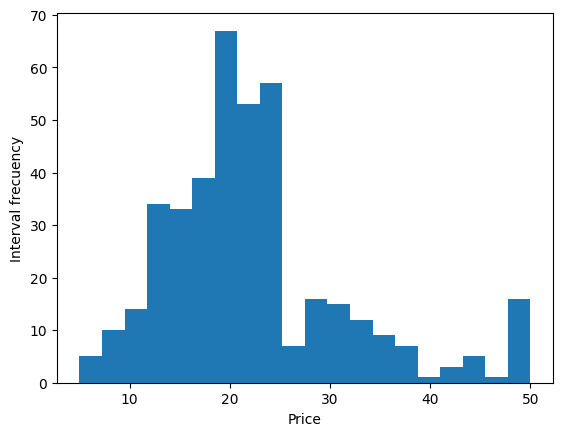

In [139]:
import matplotlib.pyplot as plt

n_bins = 20

# Generate two normal distributions
dist1 = y_train

fig, ax = plt.subplots(1, 1)

# We can set the number of bins with the *bins* keyword argument.
ax.hist(dist1, bins=n_bins)
ax.set_xlabel("Price")
ax.set_ylabel("Interval frecuency")

In [140]:
def dataRange(data):
  fdata = {}
  for (feature,i) in zip(np.transpose(data), range(1,data.shape[1]+1)):
    f = {}
    f["range"] = np.max(feature) - np.min(feature)
    f["min"] = np.min(feature)
    f["max"] = np.max(feature)
    fdata[("f"+str(i))] = f
  
  return fdata

In [141]:
dataRange(x_train)

{'f1': {'range': 88.96988, 'min': 0.00632, 'max': 88.9762},
 'f2': {'range': 100.0, 'min': 0.0, 'max': 100.0},
 'f3': {'range': 27.279999999999998, 'min': 0.46, 'max': 27.74},
 'f4': {'range': 1.0, 'min': 0.0, 'max': 1.0},
 'f5': {'range': 0.486, 'min': 0.385, 'max': 0.871},
 'f6': {'range': 5.164, 'min': 3.561, 'max': 8.725},
 'f7': {'range': 97.1, 'min': 2.9, 'max': 100.0},
 'f8': {'range': 9.5807, 'min': 1.1296, 'max': 10.7103},
 'f9': {'range': 23.0, 'min': 1.0, 'max': 24.0},
 'f10': {'range': 523.0, 'min': 188.0, 'max': 711.0},
 'f11': {'range': 9.4, 'min': 12.6, 'max': 22.0},
 'f12': {'range': 396.58, 'min': 0.32, 'max': 396.9},
 'f13': {'range': 36.24, 'min': 1.73, 'max': 37.97}}

# Preprocessing

In [142]:
# x normalization
x = np.concatenate((x_train, x_test),axis=0)
x_max = np.max(np.abs(x),axis=0)
x_train = x_train/x_max
x_test = x_test/x_max

# y normalization
y = np.concatenate((y_train, y_test),axis=0)
y_max = np.max(np.abs(y),axis=0)
y_train = y_train/y_max
y_test = y_test/y_max

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Training

## Model generation

In [144]:
"""
from tensorflow.keras.layers import Dense

def FF(NUM_FEATURES = 13, NUM_NEURONS = 128, NUM_OUTPUTS = 1, NUM_LAYERS = 3, NARROW_LAYER = 0):
	pot = 1
	n = NUM_NEURONS
	input = keras.Input(shape=(NUM_FEATURES)) 
	hidden = input
	
	for i in range(NUM_LAYERS):
		if NARROW_LAYER:
			if NARROW_LAYER >= i:
				hidden = Dense(np.floor(NUM_NEURONS/(2^pot)), activation='relu')(hidden)
				pot += 1 
			else: 
				hidden = Dense(NUM_NEURONS, activation='relu')(hidden)
		else:

		hidden = Dense(NUM_NEURONS, activation='relu')(hidden)
      
	outputs = tf.keras.layers.Dense(NUM_OUTPUTS, activation='linear')(hidden)
	model_base = tf.keras.Model(inputs=input, outputs=outputs) 
	model_base.summary()
	return model_base
 """

"\nfrom tensorflow.keras.layers import Dense\n\ndef FF(NUM_FEATURES = 13, NUM_NEURONS = 128, NUM_OUTPUTS = 1, NUM_LAYERS = 3, NARROW_LAYER = 0):\n\tpot = 1\n\tn = NUM_NEURONS\n\tinput = keras.Input(shape=(NUM_FEATURES)) \n\thidden = input\n\t\n\tfor i in range(NUM_LAYERS):\n\t\tif NARROW_LAYER:\n\t\t\tif NARROW_LAYER >= i:\n\t\t\t\thidden = Dense(np.floor(NUM_NEURONS/(2^pot)), activation='relu')(hidden)\n\t\t\t\tpot += 1 \n\t\t\telse: \n\t\t\t\thidden = Dense(NUM_NEURONS, activation='relu')(hidden)\n\t\telse:\n\n\t\thidden = Dense(NUM_NEURONS, activation='relu')(hidden)\n      \n\toutputs = tf.keras.layers.Dense(NUM_OUTPUTS, activation='linear')(hidden)\n\tmodel_base = tf.keras.Model(inputs=input, outputs=outputs) \n\tmodel_base.summary()\n\treturn model_base\n "

In [145]:
from tensorflow.keras.layers import Dense

def FF(NUM_FEATURES = 13, NUM_NEURONS = 128, NUM_OUTPUTS = 1, NUM_LAYERS = 3):
	input = keras.Input(shape=(NUM_FEATURES)) 
	hidden = input
	
	for i in range(NUM_LAYERS):
		hidden = Dense(NUM_NEURONS, activation='relu')(hidden)

      
	outputs = tf.keras.layers.Dense(NUM_OUTPUTS, activation='linear')(hidden)
	model_base = tf.keras.Model(inputs=input, outputs=outputs) 
	#model_base.summary()
	return model_base

## loss MAE, metric MSE

In [146]:
from tensorflow.keras.layers import Dense

NUM_FEATURES = 13
NUM_NEURONS = 128
NUM_OUTPUTS = 1

input = keras.Input(shape=(NUM_FEATURES))
hidden = Dense(NUM_NEURONS, activation='relu')(input) 
hidden = Dense(NUM_NEURONS/2, activation='relu')(hidden) 
hidden = Dense(NUM_NEURONS/4, activation='relu')(hidden) 
hidden = Dense(NUM_NEURONS/8, activation='relu')(hidden) 
outputs = tf.keras.layers.Dense(NUM_OUTPUTS, activation='linear')(hidden)
model_base = tf.keras.Model(inputs=input, outputs=outputs) 
model_base.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_95 (Dense)            (None, 128)               1792      
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dense_98 (Dense)            (None, 16)                528       
                                                                 
 dense_99 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainabl

In [147]:
from keras.optimizers import Adam

optimizer = Adam()
model_base.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
history = model_base.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
9/9 [==============================] - 1s 39ms/step - loss: 0.2660 - MSE: 0.1098 - val_loss: 0.1676 - val_MSE: 0.0478
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 0.1340 - MSE: 0.0331 - val_loss: 0.1441 - val_MSE: 0.0427
Epoch 3/10
9/9 [==============================] - 0s 13ms/step - loss: 0.1171 - MSE: 0.0299 - val_loss: 0.0968 - val_MSE: 0.0234
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 0.1024 - MSE: 0.0262 - val_loss: 0.0945 - val_MSE: 0.0196
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 0.0963 - MSE: 0.0234 - val_loss: 0.0897 - val_MSE: 0.0199
Epoch 6/10
9/9 [==============================] - 0s 13ms/step - loss: 0.0936 - MSE: 0.0210 - val_loss: 0.0840 - val_MSE: 0.0190
Epoch 7/10
9/9 [==============================] - 0s 13ms/step - loss: 0.0861 - MSE: 0.0188 - val_loss: 0.0865 - val_MSE: 0.0204
Epoch 8/10
9/9 [==============================] - 0s 14ms/step - loss: 0.0808 - MSE: 0.0174 - val

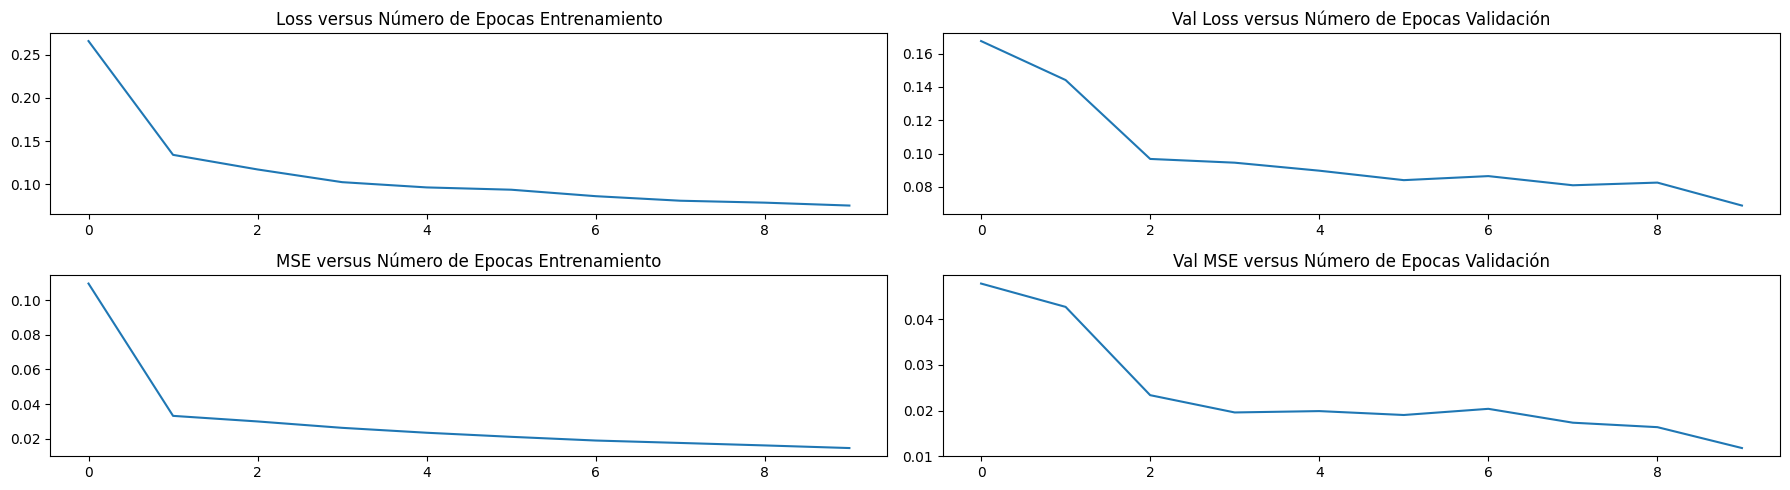

In [148]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2, 2, figsize=(18,5))
axis[0,0].plot(history.history['loss'], label='train loss')
axis[0,1].plot(history.history['val_loss'], label='val loss')
axis[1,0].plot(history.history['MSE'], label='train mse')
axis[1,1].plot(history.history['val_MSE'], label='val mse')
axis[0,0].set_title("Loss versus Número de Epocas Entrenamiento")
axis[0,1].set_title("Val Loss versus Número de Epocas Validación")
axis[1,0].set_title("MSE versus Número de Epocas Entrenamiento")
axis[1,1].set_title("Val MSE versus Número de Epocas Validación")
plt.tight_layout()
plt.show()

In [149]:
predictions = model_base.predict(x_train)
pred_and_y = np.concatenate((predictions,y_train.reshape((len(y_train),1))),axis=1)
pred_and_y*y_max

11/11 [==============================] - 0s 2ms/step


array([[26.68049634, 28.        ],
       [24.9240756 , 22.3       ],
       [23.2900992 , 11.9       ],
       [27.30975151, 31.5       ],
       [23.11237454, 22.6       ],
       [25.90290606, 25.2       ],
       [14.92305249, 15.        ],
       [17.31233895, 16.1       ],
       [24.86252189, 22.1       ],
       [20.77555358, 15.        ],
       [14.67756927, 14.        ],
       [10.6210649 ,  8.3       ],
       [18.07926595, 18.4       ],
       [21.44951075, 19.8       ],
       [20.40821165, 18.5       ],
       [18.74682307, 15.6       ],
       [22.68191427, 23.7       ],
       [13.68720978, 19.1       ],
       [12.81338632, 12.8       ],
       [13.75745982, 23.7       ],
       [30.00929654, 50.        ],
       [24.33730513, 22.9       ],
       [24.69338775, 21.1       ],
       [25.10043979, 24.1       ],
       [18.14039052, 19.3       ],
       [17.16518253, 18.3       ],
       [23.20288867, 20.5       ],
       [16.97743982, 19.5       ],
       [31.80890381,

# Simple ensemble with uncertainty

In [150]:
from tensorflow.keras.layers import Dense

def simple_model():
	NUM_FEATURES = 13
	NUM_NEURONS = 128
	NUM_OUTPUTS = 1

	input = keras.Input(shape=(NUM_FEATURES))
	hidden = Dense(NUM_NEURONS, activation='relu')(input) 
	hidden = Dense(NUM_NEURONS/(2**1), activation='relu')(hidden) 
	hidden = Dense(NUM_NEURONS/(2**2), activation='relu')(hidden) 
	hidden = Dense(NUM_NEURONS/(2**3), activation='relu')(hidden) 
	outputs = tf.keras.layers.Dense(NUM_OUTPUTS, activation='linear')(hidden)
	model = tf.keras.Model(inputs=input, outputs=outputs)
 
	return model

In [151]:
from keras.optimizers import Adam

NUM_MODELS = 3

models = [simple_model() for i in range(NUM_MODELS)]
history = []

for model in models:
	optimizer = Adam()
	model.compile(loss='MAE',optimizer=optimizer)
	history.append(model.fit(x=x_train, y=y_train, epochs=10))
 

Epoch 1/10
11/11 [==============================] - 1s 7ms/step - loss: 0.2365
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 0.1396
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 0.1102
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0957
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 0.0906
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0861
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.0826
Epoch 8/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0758
Epoch 9/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0715
Epoch 10/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0690
Epoch 1/10
11/11 [==============================] - 1s 6ms/step - loss: 0.3425
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.1502
Epoch 3/10
11/11 [==============================] -

In [152]:
predictions = [model.predict(x_val) for model in models]
weights = [model.evaluate(x_val, y_val) for model in models]

2/2 [==============================] - 0s 5ms/step - loss: 0.0488


In [153]:
weights = [weight/sum(weights) for weight in weights]

ensemble_prediction = sum([predictions[i]*weights[i]*y_max for i in range(len(models))])
uncertainty = sum([(predictions[i]*y_max-ensemble_prediction)**2*weights[i] for i in range(len(models))])


In [154]:
pred = np.concatenate((ensemble_prediction,uncertainty), axis = 1)
comparision = np.concatenate((y_val.reshape(1,len(y_val)).T*y_max,pred), axis = 1)

In [155]:
comparision

array([[1.93000000e+01, 2.12251339e+01, 2.69649088e-01],
       [2.33000000e+01, 2.47927589e+01, 1.91156816e+00],
       [1.75000000e+01, 1.89679222e+01, 1.46254748e-01],
       [2.31000000e+01, 2.32755146e+01, 3.96874845e-01],
       [2.22000000e+01, 2.34716091e+01, 4.13879037e-01],
       [1.43000000e+01, 1.68892460e+01, 1.22023989e-02],
       [5.00000000e+01, 3.93864975e+01, 2.83378243e+00],
       [2.06000000e+01, 2.02610016e+01, 1.89500153e+00],
       [2.25000000e+01, 1.71907349e+01, 1.24901041e-01],
       [1.80000000e+01, 1.93672752e+01, 1.23577297e-01],
       [1.99000000e+01, 1.90320511e+01, 1.33598828e+00],
       [1.60000000e+01, 1.86742649e+01, 2.54093055e-02],
       [2.39000000e+01, 2.83003540e+01, 1.16285169e+00],
       [1.26000000e+01, 1.77347775e+01, 1.34401888e-01],
       [1.96000000e+01, 1.90795345e+01, 1.05694520e+00],
       [1.70000000e+01, 2.19372997e+01, 4.50931835e+00],
       [2.53000000e+01, 2.46619225e+01, 3.52177858e-01],
       [2.08000000e+01, 2.09299

In [156]:
# #0: expected value, #1: prediction, #2: variance
in_range = lambda row: 1 if (row[0] >= (row[1]-row[2]) and row[0] <= (row[1]+row[2])) else 0
    
d = {'value':comparision.T[0],'prediction':comparision.T[1],'variance':comparision.T[2],'in_range':map(in_range,comparision)}
df = pd.DataFrame(d)
df

,value,prediction,variance,in_range
0,19.3,21.225134,0.269649,0
1,23.3,24.792759,1.911568,1
2,17.5,18.967922,0.146255,0
3,23.1,23.275515,0.396875,1
4,22.2,23.471609,0.413879,0
...,...,...,...,...
56,17.8,17.760942,0.147031,1
57,36.4,30.664043,1.220924,0
58,20.0,19.100693,0.657234,0
59,36.5,33.073696,1.700217,0


## Out of range values visualizations

<BarContainer object of 2 artists>

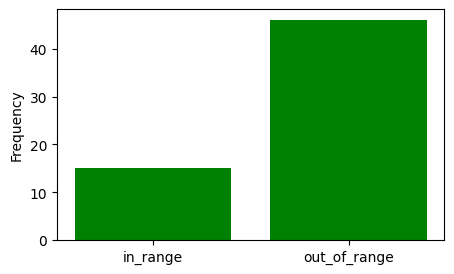

In [157]:
# TODO: bar plot con cantidad de valores in range
num_in_range = len(df[df['in_range'] == 1])
num_out_range = len(df['in_range']) - num_in_range

x_data = ['in_range', 'out_of_range']
h = [num_in_range, num_out_range]


fig = plt.figure(figsize =(5, 3))
plt.ylabel('Frequency')
plt.bar(x_data, h, color ='green')

(array([ 5., 10., 12., 12.,  1.,  1.,  2.,  2.,  0.,  1.]),
 array([ 8.8 , 12.92, 17.04, 21.16, 25.28, 29.4 , 33.52, 37.64, 41.76,
        45.88, 50.  ]),
 <BarContainer object of 10 artists>)

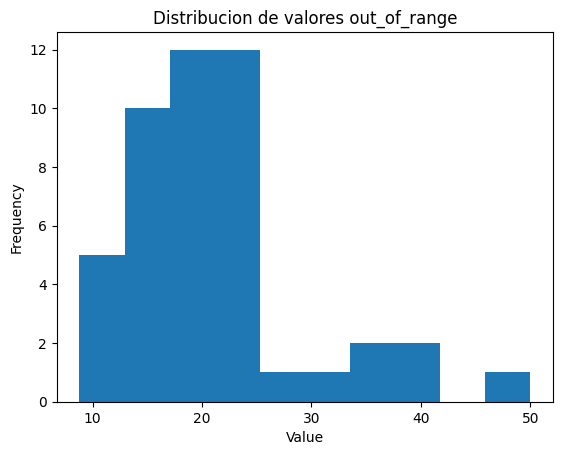

In [165]:
# TODO: histograma para ver distribucion de valores out of range
x_data = df[df['in_range'] == 0]['value']
plt.title("Distribucion de valores out_of_range")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(x_data)

## Variance visualizations

Mediana :0.38302844762802124


<BarContainer object of 2 artists>

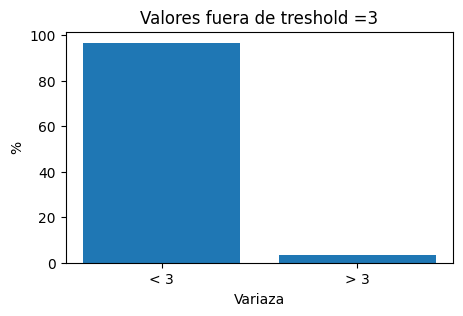

In [167]:
# TODO: agregar barras por treshold


print('Mediana :' + str(df[df['in_range'] == 0]['variance'].median()))

treshold = 3

# more than treshold
mtt = df[df['variance'] >= treshold]['variance']

# less than treshold
ltt = df[df['variance'] < treshold]['variance']

x_data = ['< 3', '> 3']
h = [len(ltt)/df.shape[0]*100,len(mtt)/df.shape[0]*100]

fig = plt.figure(figsize =(5, 3))
plt.title('Valores fuera de treshold =' + str(treshold))
plt.xlabel('Variaza')
plt.ylabel('%')
plt.bar(x_data,h)

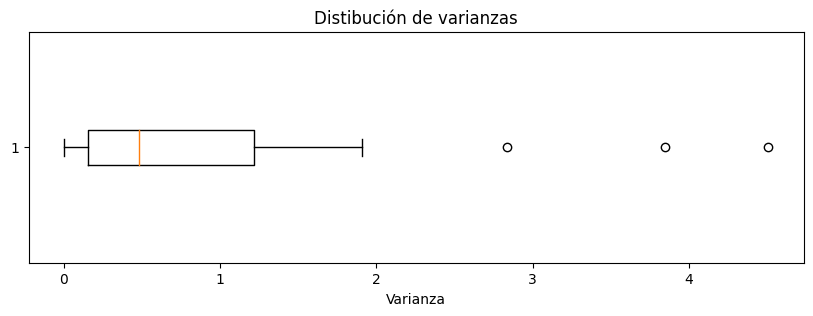

In [168]:
# TODO: boxplots con distribucion de varianzas
 
# Creating plot
fig = plt.figure(figsize =(10, 3))
plt.boxplot(df['variance'], vert = False)

plt.xlabel("Varianza")
plt.title("Distibución de varianzas")
# show plot
plt.show()

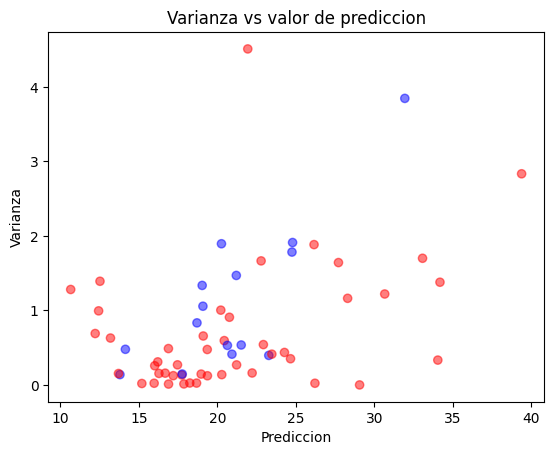

In [169]:
# TODO: scatter plot para ver posicion de varianzas mas grandes

import matplotlib.pyplot as plt

color_list = ['red','blue']

N = 50
x_data = df['prediction']
y_data = df['variance']
colors = [i for i in map(lambda in_range: color_list[in_range], df['in_range'])]
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x_data, y_data, s=area, c=colors, alpha=0.5)
plt.scatter(x_data, y_data, c=colors, alpha=0.5)

plt.xlabel("Prediccion")
plt.ylabel("Varianza")
plt.title("Varianza vs valor de prediccion")
plt.show()

## Predictors influence

## Predictors accuracy comparision

In [162]:
predictions = [model.predict(x_val) for model in models]

2/2 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Diferencia entre predicción por modelo y valor esperado')

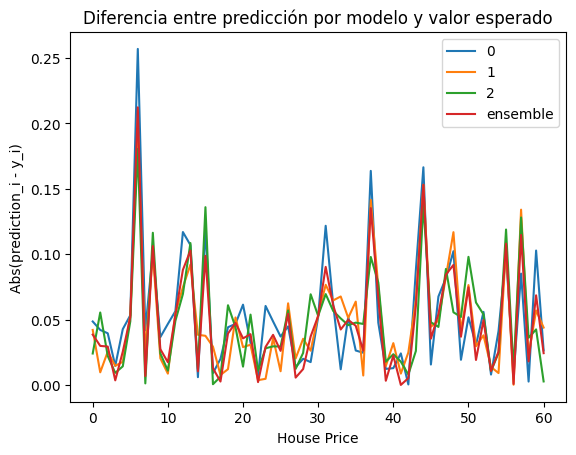

In [180]:
#TODO: algo que me permita saber la precision de los predictores en las distintas zonas de la prediccion
from scipy import interpolate

predictions_diff = abs(np.array(predictions).reshape((NUM_MODELS,len(y_val))) - y_val)

for predictor in predictions_diff:
	plt.plot(predictor)
 	
plt.plot(abs(ensemble_prediction.T[0]/y_max - y_val))
 
plt.legend([str(i) for i in range(NUM_MODELS)]+["ensemble"])

plt.xlabel("House Price")
plt.ylabel("Abs(prediction_i - y_i)")
plt.title("Diferencia entre predicción por modelo y valor esperado")

In [ ]:
# TODO: random weight initialization

In [ ]:
# Comparativa de numero de modelos
# Comparativa de diferentes conjuntos de entrenamiento